# Regresión Lineal

En el módulo de matemáticas, ya vimos la regresión lineal y cómo obtener los coeficientes de manera directa a través del cálculo matricial. Vamos a recordar el ejemplo:

Se ha hecho una encuesta a 20 personas, preguntándoles por sus ingresos anuales en miles de euros y su nivel de felicidad en una escala del 0 al 10.   
Los resultados obtenidos se guardan en las listas `x` (ingresos) e `y` (felicidad)

```Python
x = [25.2, 15.6, 26, 24, 39.2, 17.6, 3.6, 24, 10, 8.8, 35.2, 22.8, 31.6, 6, 11.2, 5.2, 22.4, 20.4, 31.2, 19.6]
y = [10, 5, 9, 8, 10, 8, 1, 9, 3, 3, 10, 5, 10, 2, 4, 4, 9, 6, 10, 7]
```

In [1]:
import numpy as np

In [2]:
x = np.array([25.2, 15.6, 26, 24, 39.2, 17.6, 3.6, 24, 10, 8.8, 35.2, 22.8, 31.6, 6, 11.2, 5.2, 22.4, 20.4, 31.2, 19.6])
y = np.array([10, 5, 9, 8, 10, 8, 1, 9, 3, 3, 10, 5, 10, 2, 4, 4, 9, 6, 10, 7])

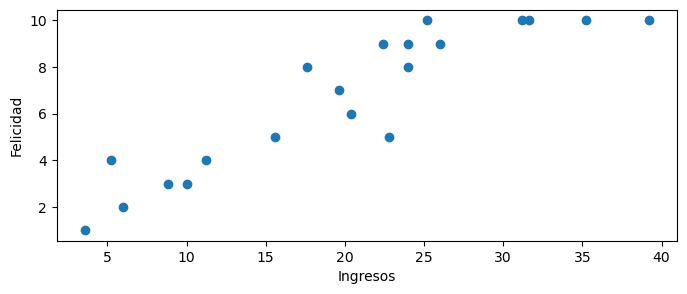

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
ax = plt.axes()
ax.scatter(x,y)
ax.set_xlabel('Ingresos')
ax.set_ylabel('Felicidad');

Buscamos la recta $h(x)=w_0+w_1x$ que mejor ajuste los puntos, aplicando mínimos cuadrados

1. Creamos la matrix $X=\begin{bmatrix} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$

In [4]:
X = np.array([np.ones(len(x)),
              np.array(x)]).transpose()

print(X.shape)
X

(20, 2)


array([[ 1. , 25.2],
       [ 1. , 15.6],
       [ 1. , 26. ],
       [ 1. , 24. ],
       [ 1. , 39.2],
       [ 1. , 17.6],
       [ 1. ,  3.6],
       [ 1. , 24. ],
       [ 1. , 10. ],
       [ 1. ,  8.8],
       [ 1. , 35.2],
       [ 1. , 22.8],
       [ 1. , 31.6],
       [ 1. ,  6. ],
       [ 1. , 11.2],
       [ 1. ,  5.2],
       [ 1. , 22.4],
       [ 1. , 20.4],
       [ 1. , 31.2],
       [ 1. , 19.6]])

2. Creamos el vector $y=\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n\end{bmatrix}$ 

In [5]:
y

array([10,  5,  9,  8, 10,  8,  1,  9,  3,  3, 10,  5, 10,  2,  4,  4,  9,
        6, 10,  7])

3. Resolvemos la ecuación matricial para obtener los coeficientes óptimos de la recta

  $w = (X^TX)^{-1}X^Ty$

In [6]:
w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
w

array([1.20002504, 0.27277152])

Comprobamos que la recta se ajusta a los puntos llamando a la siguiente función

In [7]:
def plot_all(w0,w1):

    plt.figure(figsize=(8, 4))
    ax = plt.axes()
    ax.scatter(x, y)
    ax.set_ylim([0,12])
    ax.set_xlim([0,45])
    ax.set_xlabel('Ingresos')
    ax.set_ylabel('Felicidad')
    e = np.linspace(0,45,len(x))
    z = w0+w1*e

    plt.plot(e, z, '-r', label='h(x)='+str(round(w0,2))+' + '+ str(round(w1,2))+'x')
    plt.legend(loc='upper left')
    plt.show()

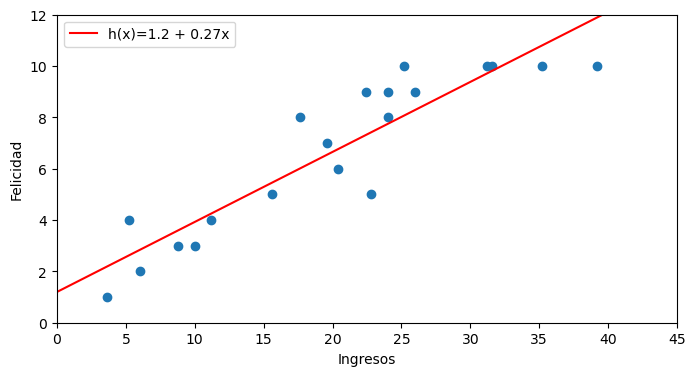

In [8]:
plot_all(w[0],w[1])

¿Cuál sería el nivel de felicidad de los que ganan 20.000€?

In [9]:
w[0] + w[1]*20

6.655455430387879

Resolvamos ahora el problema con el algoritmo del **Gradiente descendente**  

Recordando nuestra función de error:
$$\Large J(w_o,w_1) = \frac{1}{N} \sum_{i=1}^{N}(y_i -(w_0+w_1x_i))^2$$

Tenemos que caluclar el gradiente e ir en la dirección contraria para minimizar el error. Calculando las derivadas parciales obtenemos el vector gradiente:

$$\Large \nabla J(w_o,w_1) = \begin{bmatrix}
  \frac{\partial J}{\partial w_0} \\
  \frac{\partial J}{\partial w_1}
\end{bmatrix}= \begin{bmatrix}
  \frac{2}{N} \sum_{i=1}^{N}-(y_i -(w_0+w_1x_i)) \\
  \frac{2}{N} \sum_{i=1}^{N}-x_i(y_i -(w_0+w_1x_i))
\end{bmatrix}$$

De esta forma, los coeficientes $w_o$ y $w_1$ se irán actualizando en esas direcciones con un paso (*learning rate*) $\alpha$ negativo:

$$\Large w_0 \rightarrow w_0 - \alpha \frac{\partial J}{\partial w_0}$$
$$\Large w_1 \rightarrow w_1 - \alpha \frac{\partial J}{\partial w_1}$$

Vamos a programarlo en Python con $\alpha=0.001$, e inicializando aleatoriamente los parámetros de la recta de regresión, $w_0=0.5$ y $w_1=-1$ 

In [10]:
alpha = 0.001
w0 = 0.5
w1 = -1

Calculemos el error inicial

In [11]:
np.mean((y-(w0+w1*x))**2)

844.6619999999999

Ajustemos los coeficientes siguiendo el algoritmo de Gradient Descent para ver cómo disminuye el error.  
Primero calculamos las derivadas parciales

In [12]:
dJ_dw0 = 2*np.mean(-(y-(w0+w1*x)))
dJ_dw1 = 2*np.mean(-x*(y-(w0+w1*x)))

dJ_dw0, dJ_dw1

(-52.25999999999999, -1296.2440000000001)

Actualizamos los coeficientes

In [13]:
w0 = w0 - alpha*dJ_dw0
w1 = w1 - alpha*dJ_dw1

Calculamos el error ahora:

In [14]:
np.mean((y-(w0+w1*x))**2)

1.545649167418752

Se comprueba que el error disminuye. Si seguimos actualizando los coeficientes, seguirá disminuyendo. En el momento en el que deje de hacerlo, habremos encontrado los coeficientes óptimos

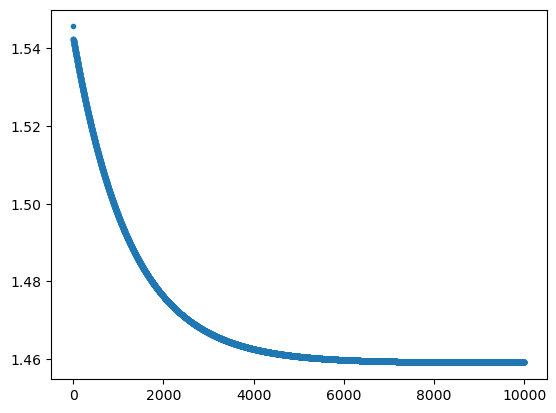

In [15]:
alpha = 0.001
w0 = 0.5
w1 = -1

epochs = 10000 # número de iteraciones
error = []

for k in range(epochs):
    dJ_dw0 = 2*np.mean(-(y-(w0+w1*x)))
    dJ_dw1 = 2*np.mean(-x*(y-(w0+w1*x)))
    w0 = w0-alpha*dJ_dw0
    w1 = w1-alpha*dJ_dw1
    error.append(np.mean((y-(w0+w1*x))**2))
    
plt.plot(error,'.')

In [16]:
w0, w1

(1.1877931562849213, 0.2732622355016479)

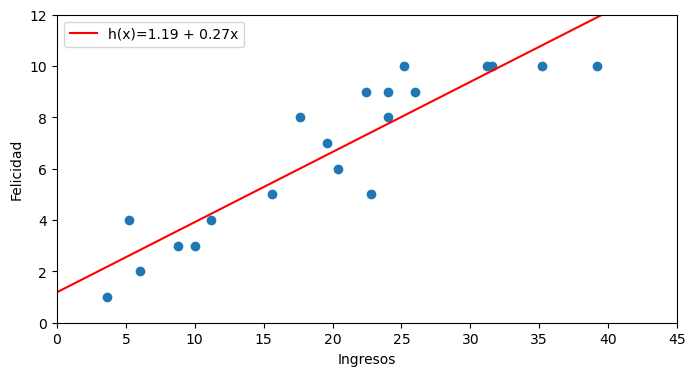

In [17]:
plot_all(w0,w1)

Ya que estamos, ¿por qué no creamos una clase que haga modelos de regresión?

In [18]:
class LinReg:
    
    def __init__(self,w0=1,w1=1,lr=0.001):
        self.w0 = w0
        self.w1 = w1
        self.lr = lr
        
    def cost(self,x,y):
        return np.mean((y-(self.w0+self.w1*x))**2)
    
    def fit(self,x,y):
        for k in range(10000):
            dJ_dw0 = 2*np.mean(-(y-(self.w0+self.w1*x)))
            dJ_dw1 = 2*np.mean(-x*(y-(self.w0+self.w1*x)))
            self.w0 = self.w0-self.lr*dJ_dw0
            self.w1 = self.w1-self.lr*dJ_dw1
            
    def plot_results(self,x,y):
        plt.figure(figsize=(8, 4))
        ax = plt.axes()
        ax.scatter(x, y)
        ax.set_ylim([0,12])
        ax.set_xlim([0,45])
        ax.set_xlabel('Ingresos')
        ax.set_ylabel('Felicidad')
        e = np.linspace(0,45,len(x))
        z = self.w0+self.w1*e
        plt.plot(e, z, '-r', label='h(x)='+str(round(self.w0,2))+' + '+ str(round(self.w1,2))+'x')
        plt.legend(loc='upper left')
        plt.show()
        
    def predict(self, x):
        return self.w0 + self.w1*x
    
    def params(self):
        return (self.w0, self.w1)

In [19]:
model = LinReg(w0=0.5, w1=-1, lr=0.001)

In [20]:
model.cost(x,y)

844.6619999999999

In [21]:
model.params()

(0.5, -1)

In [22]:
model.fit(x,y)

In [23]:
model.params()

(1.1877931562849213, 0.2732622355016479)

In [24]:
model.cost(x,y)

1.4591526858177823

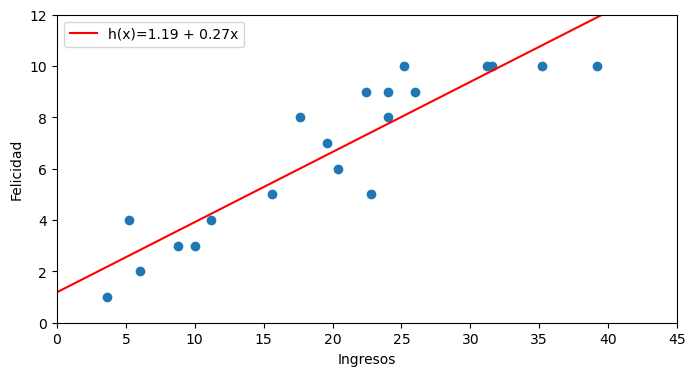

In [25]:
model.plot_results(x,y)

Ahora, utilizemos la librería `sklearn` para hacer la regresión lineal

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# Creando un objeto de la clase LinearRegression
lm = LinearRegression()

# Entrenar el modelo
lm.fit(x.reshape(-1, 1),y.reshape(-1, 1))

LinearRegression()

In [28]:
lm.intercept_

array([1.20002504])

In [29]:
lm.coef_

array([[0.27277152]])

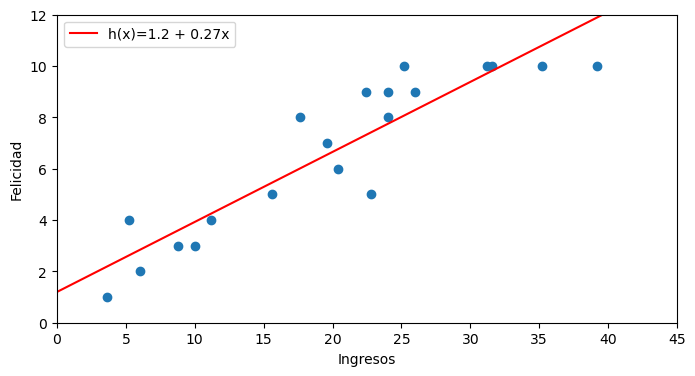

In [30]:
plot_all(lm.intercept_[0], lm.coef_[0][0])

Por último, añadimos una nueva variable: el estado civil de los encuestados: S (soltero/a), C (casado/a), V (viudo/a):   
`['S','C','S','V','C','S','C','S','C','C','V','S','C','C','V','C','S','V','C','S']`

In [31]:
estado = np.array(['S','C','S','V','C','S','C','S','C','C','V','S','C','C','V','C','S','V','C','S'])

In [32]:
import pandas as pd
df = pd.DataFrame({'Salario':x, 'Estado':estado, 'Felicidad':y})
df

,Salario,Estado,Felicidad
0,25.2,S,10
1,15.6,C,5
2,26.0,S,9
3,24.0,V,8
4,39.2,C,10
5,17.6,S,8
6,3.6,C,1
7,24.0,S,9
8,10.0,C,3
9,8.8,C,3


Necesito convertir la variable categórica a numérica. Probemos con un one-hot-encoding

In [33]:
df2 = pd.get_dummies(df)
df2

,Salario,Felicidad,Estado_C,Estado_S,Estado_V
0,25.2,10,0,1,0
1,15.6,5,1,0,0
2,26.0,9,0,1,0
3,24.0,8,0,0,1
4,39.2,10,1,0,0
5,17.6,8,0,1,0
6,3.6,1,1,0,0
7,24.0,9,0,1,0
8,10.0,3,1,0,0
9,8.8,3,1,0,0


En regresión lineal, evitamos tener columnas que sean combinaciones lineales. Por tanto, descartamos una de las columnas binarias

In [35]:
X = df2[['Salario','Estado_S','Estado_C']].values
y = df2[['Felicidad']].values

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [37]:
# Entrenar el modelo
lm.fit(X,y)

LinearRegression()

In [38]:
lm.intercept_

array([1.09339907])

In [39]:
lm.coef_

array([[ 0.26020268,  1.1911805 , -0.13147083]])

Felicidad = 1.09 + 0.26xIngresos + 1.19xSoltero -0.13xCasado

Comprobamos que obtendríamos el mismo resultado con la ecuación normal

In [42]:
X = np.array([np.ones(len(x)),
              np.array(x),
              np.array(df2.Estado_S),
              np.array(df2.Estado_C)
             ]).transpose()
X

array([[ 1. , 25.2,  1. ,  0. ],
       [ 1. , 15.6,  0. ,  1. ],
       [ 1. , 26. ,  1. ,  0. ],
       [ 1. , 24. ,  0. ,  0. ],
       [ 1. , 39.2,  0. ,  1. ],
       [ 1. , 17.6,  1. ,  0. ],
       [ 1. ,  3.6,  0. ,  1. ],
       [ 1. , 24. ,  1. ,  0. ],
       [ 1. , 10. ,  0. ,  1. ],
       [ 1. ,  8.8,  0. ,  1. ],
       [ 1. , 35.2,  0. ,  0. ],
       [ 1. , 22.8,  1. ,  0. ],
       [ 1. , 31.6,  0. ,  1. ],
       [ 1. ,  6. ,  0. ,  1. ],
       [ 1. , 11.2,  0. ,  0. ],
       [ 1. ,  5.2,  0. ,  1. ],
       [ 1. , 22.4,  1. ,  0. ],
       [ 1. , 20.4,  0. ,  0. ],
       [ 1. , 31.2,  0. ,  1. ],
       [ 1. , 19.6,  1. ,  0. ]])

In [44]:
w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
w

array([[ 1.09339907],
       [ 0.26020268],
       [ 1.1911805 ],
       [-0.13147083]])

Predice la felicidad de un hombre casado con ingresos de 14.000€

In [45]:
lm.predict(np.array([[14,0,1]]))

array([[4.60476582]])

¿Aumentaría su felicidad si es soltero o viudo?

In [46]:
lm.predict(np.array([[14,1,0]]))

array([[5.92741715]])

In [47]:
lm.predict(np.array([[14,0,0]]))

array([[4.73623665]])

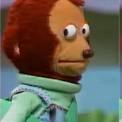